# ECE457A Assignment 2

**By: Logan Hartford**

**Due: 10/11/2024**

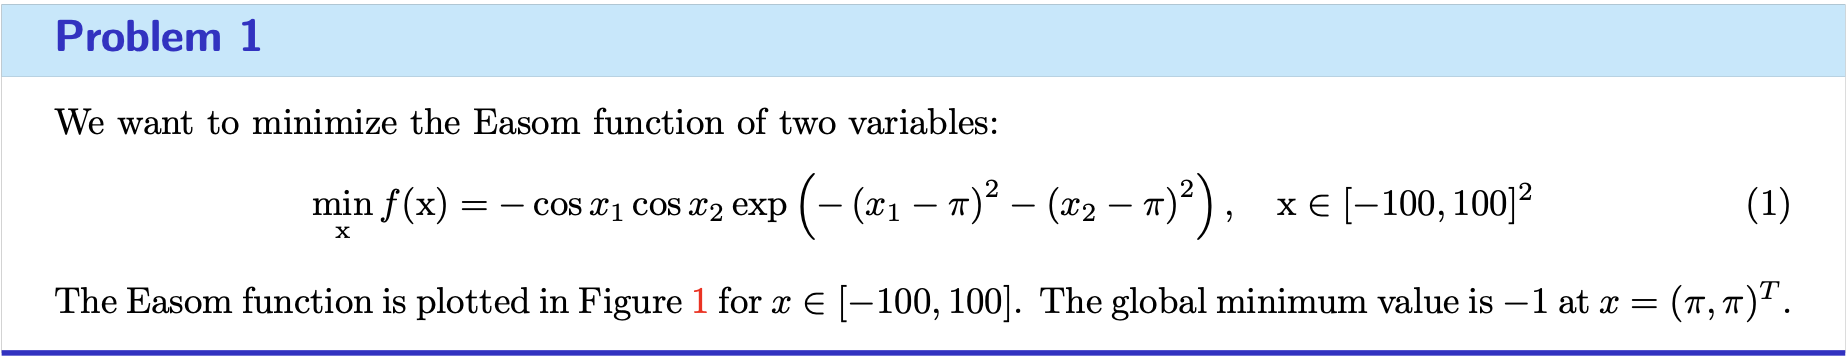

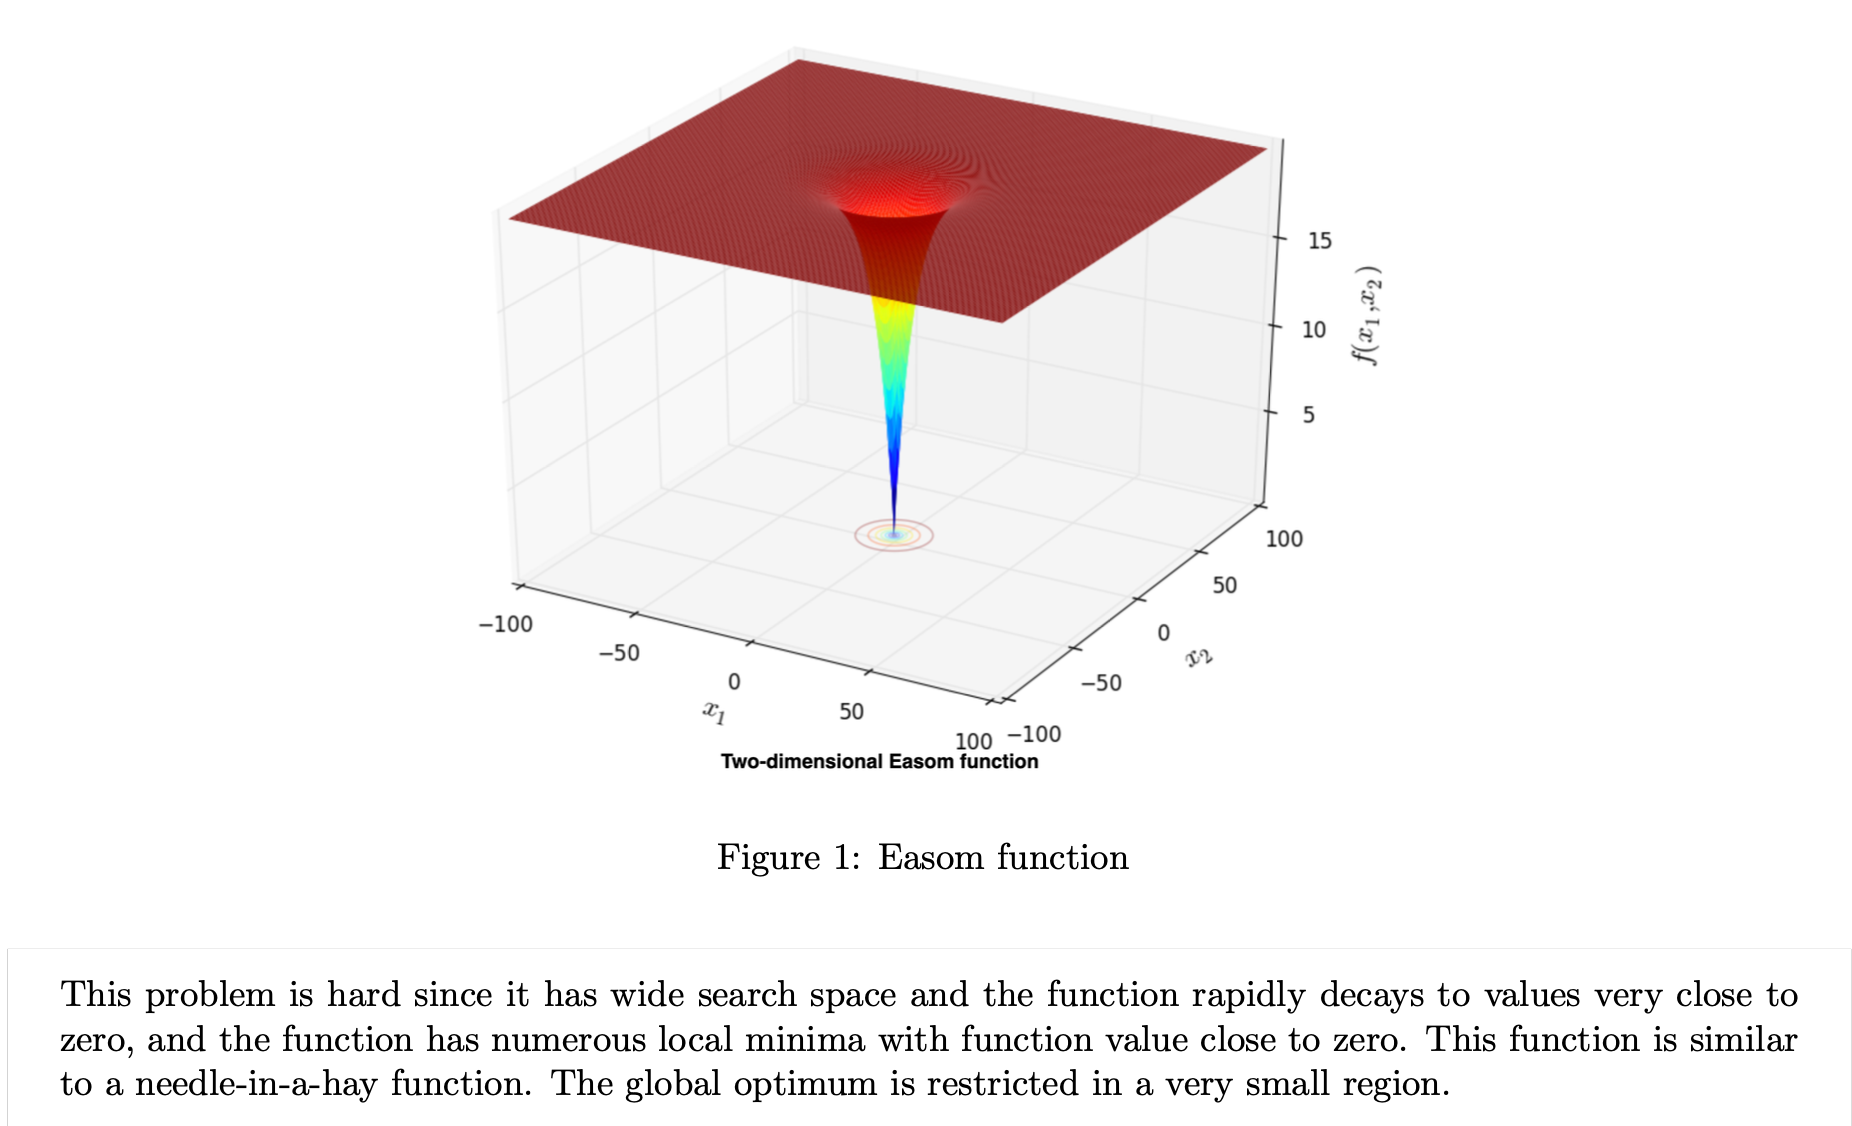

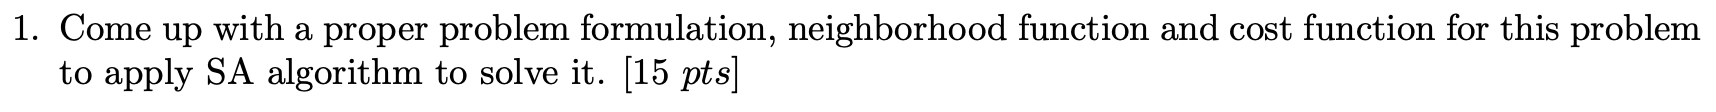

### 1.1 Problem Formulation

#### 1.1.1 Objective
- Minimize the Easom function.

#### 1.1.2 Search Space
- The search space consists of all possible pairs of input values within the given range. 
- This means any combination of two values between -100 and 100 is a potential solution.

#### 1.1.3 Initial Solution
- Start with a randomly chosen pair of input values within the search space.

#### 1.1.4 Neighboorhood Definition
- A neighboring solution is found by slightly altering the current pair of input values.
- This adjustment is done by adding a small random change to each input. 
- The amount of change should decrease gradually as the solution progresses.

#### 1.1.5 Acceptance Criteria
- Compare neighbooring solution with current solution.
- If the new solution is better, accept it.
- If it is worse, accpet it based on a probability that decreases as the algorithm proceeds.

#### 1.1.6 Cooling Schedule
- Gradually reduce the temperature parameter over time. 
- The temperature starts high, allowing more frequent acceptance of worse solutions to escape local minima.
- Then decreases progressivly to make the algorithm more selective as it converges to a minimum.

#### 1.1.7 Stopping Criteria
- The temperature becomes very low, or
- A maximum number of iterations is reached, or 
- There is no noticeable improvement in the function value over a set number of iterations.

#### 1.1.8 Evaluation and Output
- Track the best solution found throughout the optimization process.
- Evaluate the performance of the algorithm with different parameter settings.

### 1.2 Neighborhood Function
- Generates new candidates by making small random changes to the current inputs.
- The small random changes are often taken from Guassian distribution with mean 0 or a uniform distribution.

### 1.3 Cost Function
- The cost function evaluates the quality of a state.
- In this case, the only measure of quality it the value of the function at a state.
- The cost function is therefore, the function itself.

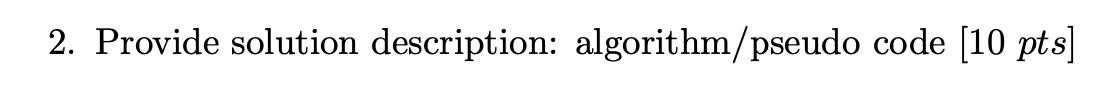

### 1.2 Pseudo Code

#### Algorithm: Simulated Annealing for Minimizing Easom Function

**Input:**  
Initial solution `(x1, x2)`, initial temperature `T`, cooling rate `alpha`,  
minimum temperature `Tmin`, maximum iterations `max_iter`

**Output:**  
Best solution found `(x1_best, x2_best)` and its function value `f_best`

1. Initialize `(x1_current, x2_current)` with a random point in `[-100, 100]^2`
2. Set `x1_best`, `x2_best` to `x1_current`, `x2_current`
3. Compute `f_current = Easom(x1_current, x2_current)`
4. Set `f_best = f_current`
5. While `T > Tmin`:
    
    a. For `i = 1` to `max_iter`:
        
    i.   Generate new potential solution `(x1_new, x2_new)` by adding a small random change  
            to `(x1_current, x2_current)`  
            - `x1_new = x1_current + random change`  
            - `x2_new = x2_current + random change`

    ii.  Compute `f_new = Easom(x1_new, x2_new)`

    iii. If `f_new < f_current`:
            - Accept the new solution  
            - Set `(x1_current, x2_current) = (x1_new, x2_new)`  
            - Set `f_current = f_new`  
            Else:
            - Accept the new solution with probability `P = exp(-(f_new - f_current) / T)`  
                (generate a random number between 0 and 1; if it is less than `P`, accept the solution)

    iv.  If `f_current < f_best`:
            - Update the best solution: `(x1_best, x2_best) = (x1_current, x2_current)`  
            - Set `f_best = f_current`

    b. Reduce the temperature: `T = alpha * T`

6. Return `(x1_best, x2_best)` and `f_best`


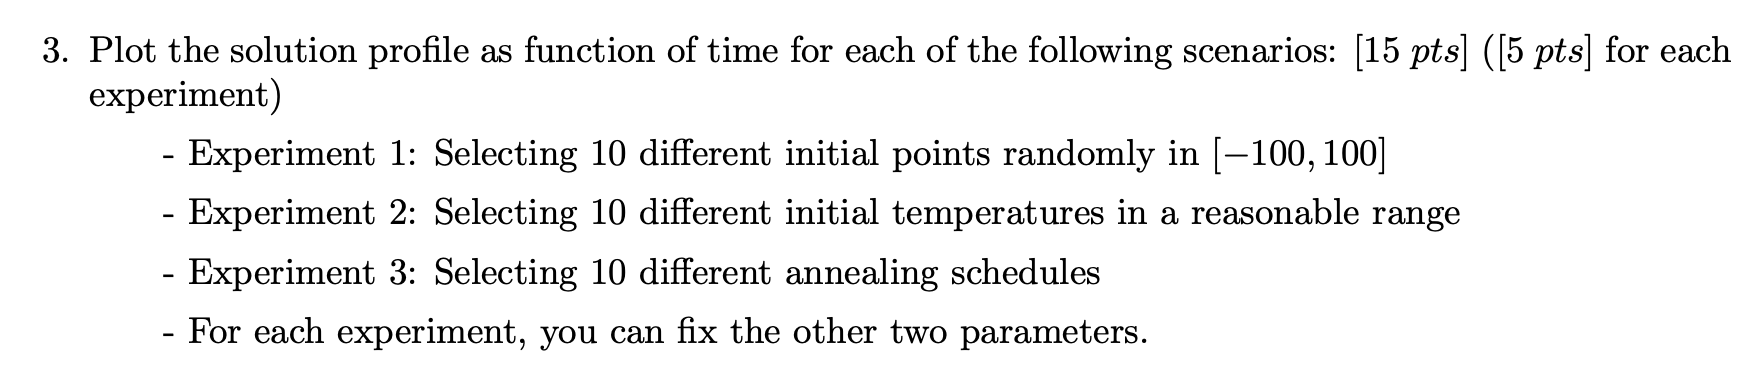

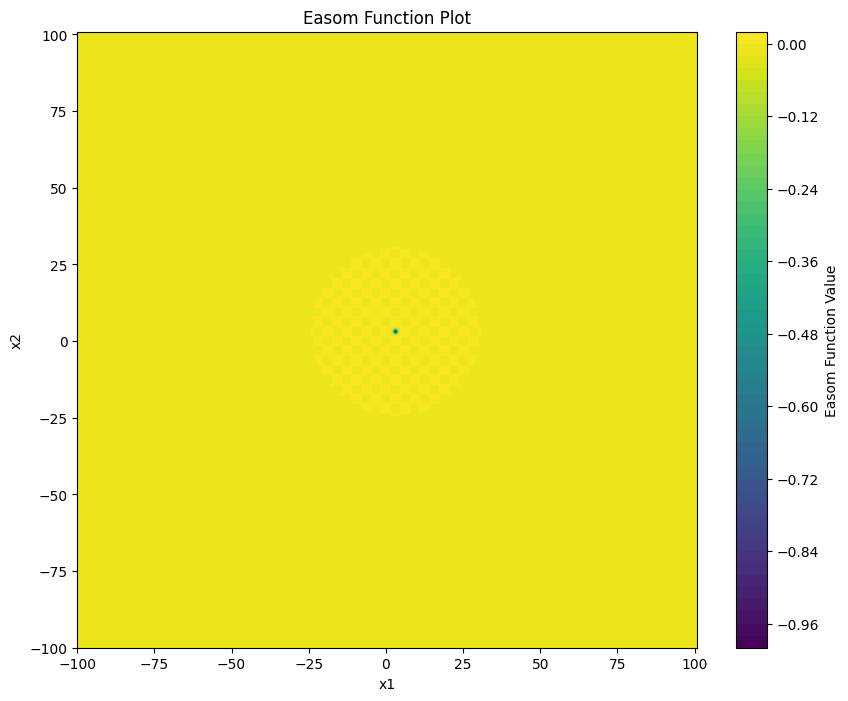

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def easom(x1, x2):
    return -np.cos(x1) * np.cos(x2) * np.exp(-(x1 - np.pi)**2 - (x2 - np.pi)**2)

# Chat gpt made this function
def plot_easom_function():
    x1_vals = np.arange(-100, 101, 0.1)
    x2_vals = np.arange(-100, 101, 0.1)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

    z_vals = easom(x1_grid, x2_grid)

    plt.figure(figsize=(10, 8))
    plt.contourf(x1_grid, x2_grid, z_vals, levels=50, cmap='viridis')
    plt.colorbar(label='Easom Function Value')
    plt.title('Easom Function Plot')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plot_easom_function()


In [3]:
print(easom(np.pi, np.pi))
print(easom(3, 3))
print(easom(2, 2))

-1.0
-0.9415641575364946
-0.012779642669914994


In [21]:
def simulated_annealing(initial_solution, initial_temp, cooling_rate, max_iter, min_temp, step_size=5):
    x1_current, x2_current = initial_solution
    f_current = easom(x1_current, x2_current)
    x1_best, x2_best, f_best = x1_current, x2_current, f_current
    T = initial_temp

    f_history = [f_best]

    for i in range(max_iter):
        # Generate neighbour
        x1_new = x1_current + np.random.uniform(-step_size, step_size)
        x2_new = x2_current + np.random.uniform(-step_size, step_size)
        print(x1_new, x2_new)
        f_new = easom(x1_new, x2_new)

        diff = f_new - f_current
        metropolis = np.exp(-(diff) / T)
        prob = np.random.rand()
        # print(f"diff: {diff}, metropolis: {metropolis}, prob: {prob}")
        if diff < 0 or prob < metropolis:
            x1_current, x2_current, f_current = x1_new, x2_new, f_new

        # Update best solution
        if f_current < f_best:
            x1_best, x2_best, f_best = x1_current, x2_current, f_current

        f_history.append(f_best)

        # Cool down
        T *= cooling_rate

        if i % 100 == 0:
            print(f"Iteration {i}, Best solution: {f_best}")

    return (x1_best, x2_best), f_best, f_history


50.343088224136054 50.78642416893511
Iteration 0, Best solution: -0.0
49.59008822804969 50.22839880106883
50.13058101486117 49.372194417101575
49.208115222663054 49.81042945130641
48.38982180895653 50.6916131319805
48.62643695366997 50.96653741481661
48.89319387063107 51.73178812259682
48.95955037436002 51.25362952581038
48.88078031676897 51.76248562833439
49.18644447700037 51.91891554768209
49.498378393945394 52.764234214145
49.23101248115167 53.00016165348423
49.772645338945054 52.245868651569886
49.67409571507189 52.15140532672976
49.5085153305312 52.62439872534682
49.68349325931603 52.99094300170624
49.907064813612244 52.3837663294992
50.33075116904337 51.96300221102675
51.24095745988916 50.990639043909255
50.404711851014405 50.041420968866404
50.79360875085229 49.8609807882565
50.43415838799597 49.5525442151785
50.50094675708434 50.008740780333355
50.85418669529314 49.37720750364526
50.17055331726328 48.40425755380746
49.546100002892544 48.91772180256078
50.42560633578819 49.78442

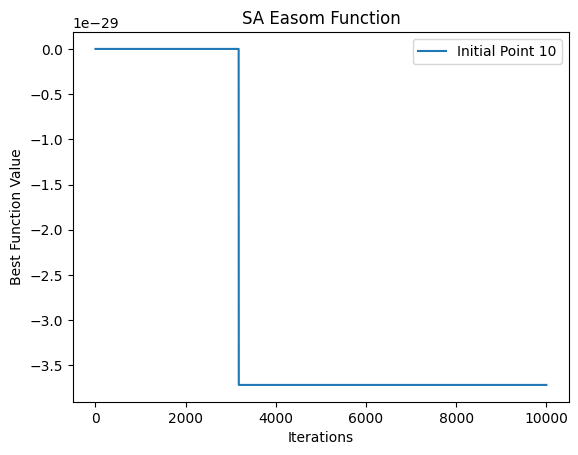

In [23]:
best, f_best, f_history = simulated_annealing((50, 50), 100, 0.99, 10000, 0.1, step_size=1)
plt.plot(f_history, label=f'Initial Point {i+1}')
plt.title('SA Easom Function')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

[-38.36534987  -2.18959749]


/var/folders/2k/4qr02sn90yvdch9k5gzldk5h0000gn/T/ipykernel_51720/3043582148.py:16: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-(diff) / T)


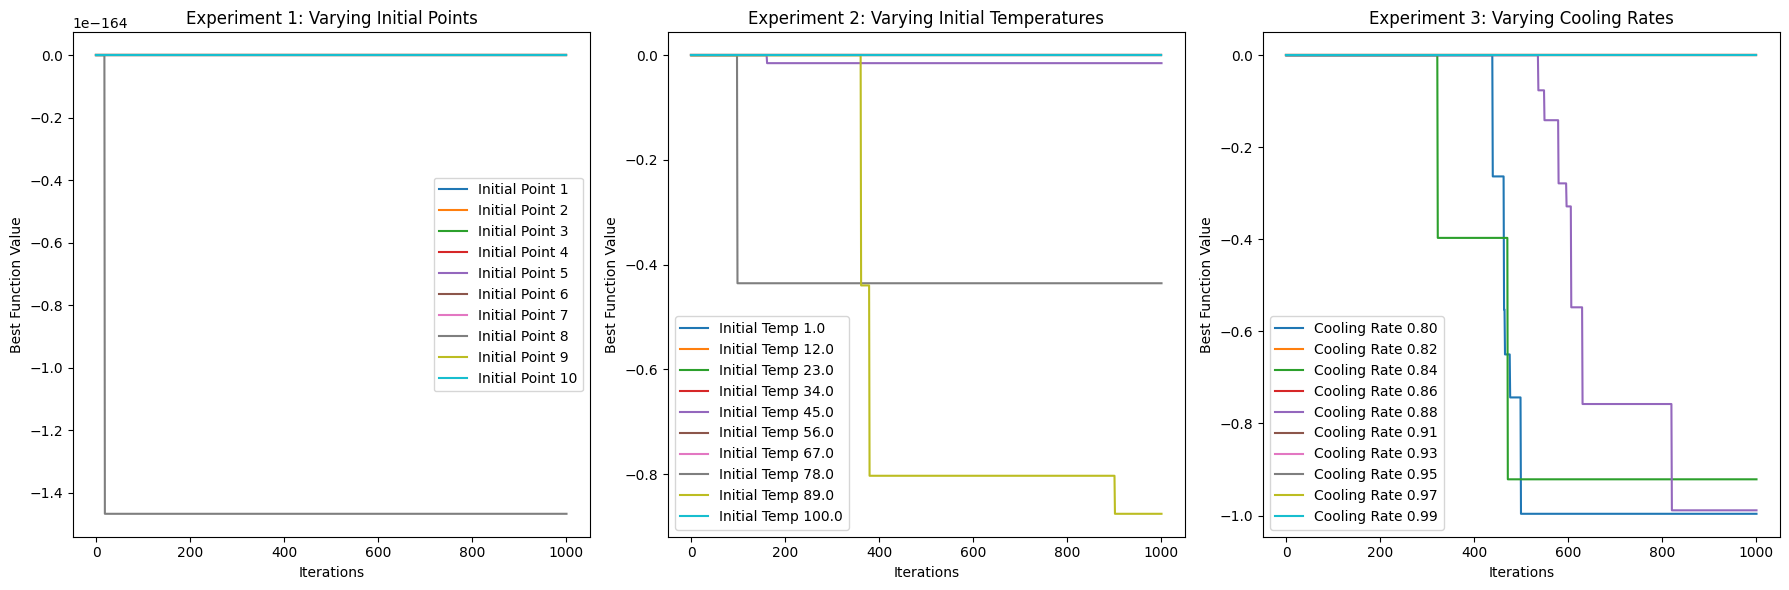

In [12]:
# Parameters for experiments
initial_points = [np.random.uniform(-100, 100, 2) for _ in range(10)]
initial_temperatures = np.linspace(1, 100, 10)
cooling_rates = np.linspace(0.8, 0.99, 10)
min_temp = 1e-14
max_iter = 1000
best_temp = 1
best_cr = 0.95
rand_start = np.random.uniform(-100, 100, 2)
print(rand_start)


# Experiment 1: Varying initial points
experiment1_results = []
for point in initial_points:
    _, _, f_history = simulated_annealing(point, best_temp, best_cr, max_iter, min_temp)
    experiment1_results.append(f_history)

# Experiment 2: Varying initial temperatures
experiment2_results = []
for temp in initial_temperatures:
    _, _, f_history = simulated_annealing(rand_start, temp, best_cr, max_iter, min_temp)
    experiment2_results.append(f_history)

# Experiment 3: Varying cooling rates
experiment3_results = []
for rate in cooling_rates:
    _, _, f_history = simulated_annealing(rand_start, best_temp, rate, max_iter, min_temp)
    experiment3_results.append(f_history)

# Plotting results for each experiment
plt.figure(figsize=(18, 6))

# Plot for Experiment 1
plt.subplot(1, 3, 1)
for i, f_history in enumerate(experiment1_results):
    plt.plot(f_history, label=f'Initial Point {i+1}')
plt.title('Experiment 1: Varying Initial Points')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 2
plt.subplot(1, 3, 2)
for i, f_history in enumerate(experiment2_results):
    plt.plot(f_history, label=f'Initial Temp {initial_temperatures[i]:.1f}')
plt.title('Experiment 2: Varying Initial Temperatures')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

# Plot for Experiment 3
plt.subplot(1, 3, 3)
for i, f_history in enumerate(experiment3_results):
    plt.plot(f_history, label=f'Cooling Rate {cooling_rates[i]:.2f}')
plt.title('Experiment 3: Varying Cooling Rates')
plt.xlabel('Iterations')
plt.ylabel('Best Function Value')
plt.legend()

plt.tight_layout()
plt.show()

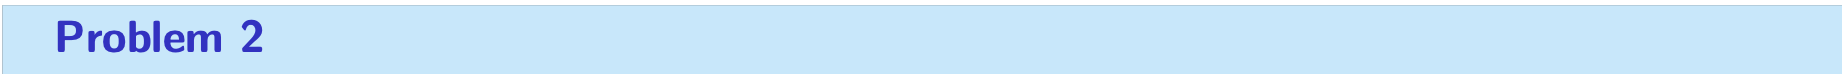

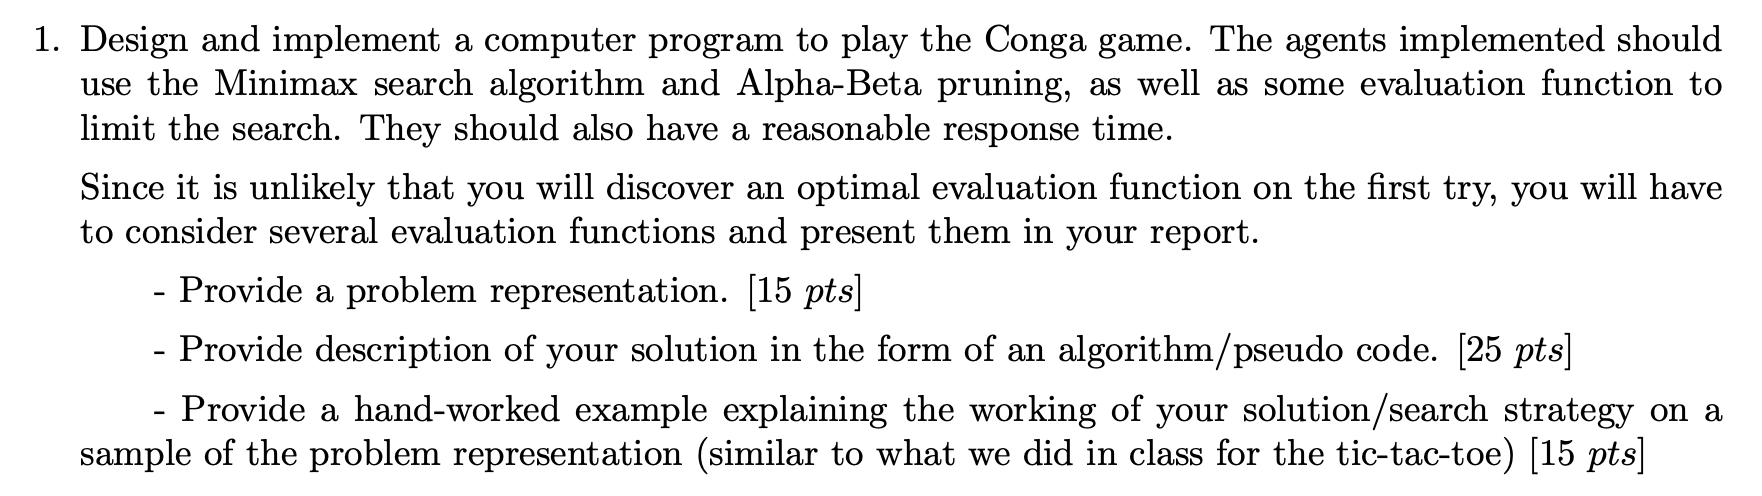

### 2.1 Problem Representation

#### 2.1.1 Objective
- Develop an agent that can play the Conga game rationally, aiming to block the opponent's stones so they have no legal moves.

#### 2.1.2 Search Space
- The search space consists of all possible valid game states.
- Each state is defined by the positions of the stones for both players on a 4x4 board.

#### 2.1.3 Initial Solution
- Player 1 has ten black stones in (1,4), and Player 2 has ten white stones in (4,1).

#### 2.1.4 Neighborhood Definition
- The neighboring states are defined by all possible valid moves for the current player.
- A valid move involves moving stones from one square to one or more adjacent squares, according to the game rules.

#### 2.1.5 Move Evaluation
- Use a Minimax algorithm with Alpha-Beta pruning to evaluate the potential outcomes of moves.
- The evaluation function estimates the quality of a game state for the current player.
- Possible evaluation criteria could include the number of stones in advantageous positions or the number of blocked opponent stones.

#### 2.1.6 Search Strategy
- Use a depth-limited Minimax search with Alpha-Beta pruning to explore possible game states.
- At each turn, select the move that maximizes the minimum score obtainable by the opponent.

#### 2.1.7 Stopping Criteria
- The game ends when one player has no legal moves left.

#### 2.1.8 Evaluation and Output
- Output the chosen move, the evaluation score of the move, and the number of nodes explored during the search.
- Measure the agent's performance by playing multiple games against a Random Agent.

### 2.1 Pseudo Code

#### Function Definitions
1. **Minimax(state, depth, alpha, beta, maximizingPlayer):**
    - **Input:**
        - `state`: Current board configuration.
        - `depth`: Current search depth.
        - `alpha`: The best score that the maximizing player can guarantee so far.
        - `beta`: The best score that the minimizing player can guarantee so far.
        - `maximizingPlayer`: Boolean indicating if the current player is the maximizing player.
    - **Output:**
        - The evaluation score for the current state.

    - **Base Case:**
        - If `depth` is 0 or the game is over (no legal moves for either player), return the evaluation of `state`.

    - **If maximizingPlayer is true:**
        - Set `maxEval = -∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, false)`
            - `maxEval = max(maxEval, eval)`
            - `alpha = max(alpha, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `maxEval`

    - **Else (minimizingPlayer is true):**
        - Set `minEval = ∞`
        - For each valid move in `state`:
            - Apply the move to generate `newState`.
            - `eval = Minimax(newState, depth - 1, alpha, beta, true)`
            - `minEval = min(minEval, eval)`
            - `beta = min(beta, eval)`
            - If `beta ≤ alpha`, break (prune the search)
        - Return `minEval`

2. **EvaluationFunction(state):**
    - Calculate a score for the given `state`.
    - Some things to try:
        - The number of legal moves available for the opponent.
        - The number of postions controlled by the agent minus the positions controlled by the opponent.
        - Difference is largest concentration of stones between the two players.
        - The total number of squares available for captures across valid moves.
        - Number of stones with valid moves.
    - Return the calculated score.

3. **GenerateLegalMoves(state, player):**
    - Given the current `state` and the `player`, generate a list of all valid moves according to the game rules.
    - Return the list of moves.

#### Main Algorithm

1. **Initialize:**
    - `currentState = initial board configuration`
    - `player = maximizingPlayer (e.g., Player 1)`

2. **Game Loop:**
    - While the game is not over (current player has valid moves):
        - If `player` is the maximizing player:
            - Set `bestMove = None`
            - Set `bestValue = -∞`
            - For each move in `GenerateLegalMoves(currentState, player)`:
                - Apply the move to generate `newState`.
                - `moveValue = Minimax(newState, searchDepth, -∞, ∞, false)`
                - If `moveValue > bestValue`:
                    - `bestValue = moveValue`
                    - `bestMove = move`
            - Update `currentState` with `bestMove`.
        - Else (minimizing player):
            - Follow the same procedure, but minimize the `moveValue`.

        - Switch `player` to the other player.
    
3. **End of Game:**
    - Output the result of the game (winner, final board configuration, number of turns taken).


### 2.1 Hand Worked Example

#### Initial Conditions
- Player1 is Maximizing player.
- Player1 starts.
- Depth = 3
- Start of game.

#### Evaluation Function
- Number of valid moves for Player1, minus number of valid moves for Player2

#### MinMax Tree
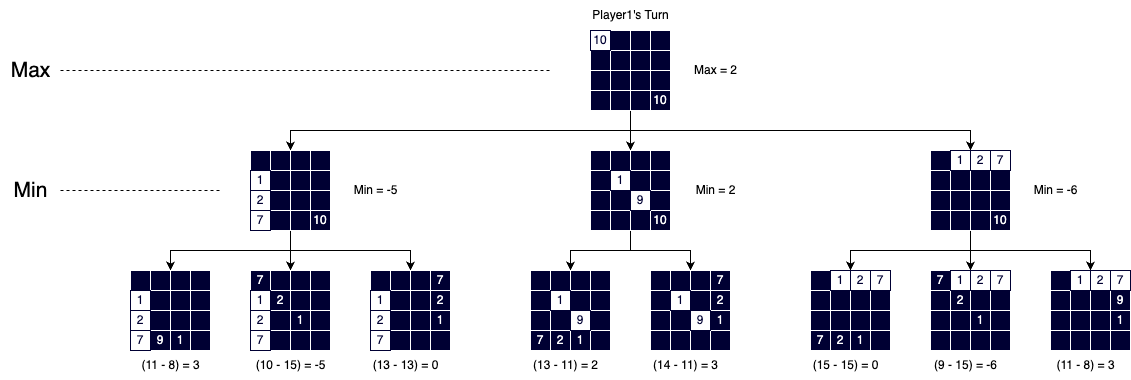

- In this case Player1's first move would be to move diagonally.

### MinMax With Alpha-Beta Pruning
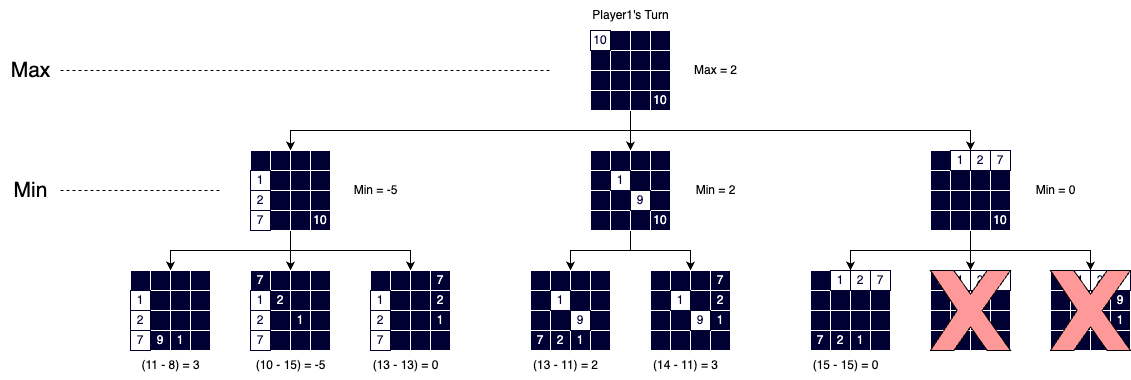

- The two right most nodes are never explored.

### 2.1 Building out The Game

In [24]:
# Creating the game board
def create_board():
    return np.array([
        [10, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, -10],
        ])

board = create_board()
print(board)

[[ 10   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 -10]]


In [31]:
import numpy as np

def generate_moves(board, player):
    """
    Generates all valid moves for the given player.
    
    Args:
        board (np.array): The current board state.
        player (int): The player making the move (1 for Player 1, -1 for Player 2).
    
    Returns:
        list: A list of tuples where each tuple contains:
              - (start_row, start_col): The starting position.
              - (direction): The direction of movement
    """
    moves = []
    directions = [
        (-1, 0),  # up
        (1, 0),   # down
        (0, -1),  # left
        (0, 1),   # right
        (-1, -1), # up-left
        (-1, 1),  # up-right
        (1, -1),  # down-left
        (1, 1)    # down-right
    ]

    # Iterate through the board to find the player's stones
    for row in range(4):
        for col in range(4):
            # If stone belongs to player
            if board[row, col] * player > 0:
                for direction in directions:
                    new_row, new_col = row + direction[0], col + direction[1]

                    # Check if the move is within the board boundaries
                    if 0 <= new_row < 4 and 0 <= new_col < 4:
                        # The move is valid if the destination is not occupied by the opponent
                        if board[new_row, new_col] * player >= 0:
                            moves.append(((row, col), direction))

    return moves

# Example usage
board = np.array([
        [10, 0, 0, 0],
        [0, -9, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 0],
        ])
player = 1  # Player 1's turn
moves = generate_moves(board, player)
print("Possible moves for Player 1:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")

player = -1  # Player 2's turn
moves = generate_moves(board, player)
print("\nPossible moves for Player 2:")
for move in moves:
    print(f"Start: {move[0]}, Direction: {move[1]}")



Possible moves for Player 1:
Start: (0, 0), Direction: (1, 0)
Start: (0, 0), Direction: (0, 1)

Possible moves for Player 2:
Start: (1, 1), Direction: (-1, 0)
Start: (1, 1), Direction: (1, 0)
Start: (1, 1), Direction: (0, -1)
Start: (1, 1), Direction: (0, 1)
Start: (1, 1), Direction: (-1, 1)
Start: (1, 1), Direction: (1, -1)
Start: (1, 1), Direction: (1, 1)
Start: (2, 2), Direction: (-1, 0)
Start: (2, 2), Direction: (1, 0)
Start: (2, 2), Direction: (0, -1)
Start: (2, 2), Direction: (0, 1)
Start: (2, 2), Direction: (-1, -1)
Start: (2, 2), Direction: (-1, 1)
Start: (2, 2), Direction: (1, -1)
Start: (2, 2), Direction: (1, 1)
